# Logistic Regression

## s

In [1]:
import pandas as pd
import sys
import os
sys.path.append(os.getcwd()[:-18])
from source.utils import get_dataFrame_withShortCols, data_cleaner, preprocess_data
import seaborn as snus
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

In [11]:
# preprocessed data 
train_data = preprocess_data(data_cleaner(get_dataFrame_withShortCols('development_sample.csv')))
val_data = preprocess_data(data_cleaner(get_dataFrame_withShortCols('testing_sample.csv')))

c:\Users\mikol\PycharmProjects\Pre-selection Assignment\Pre-selection-Assignment\source\utils.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan_purpose_1_0'] = ((df_loan_purpose['loan_purpose_1.0'] == 1) & (df['Clasification of the vehicle'] == 0)).astype(int)
c:\Users\mikol\PycharmProjects\Pre-selection Assignment\Pre-selection-Assignment\source\utils.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan_purpose_1_1'] = ((df_loan_purpose['loan_purpose_1.0'] == 1) & (df['Clasification of

## Old Model 

In [26]:
cm_r = confusion_matrix(train_data['Default indicator'], (train_data['_r_'] > 0.5).astype(int))
accuracy_r = accuracy_score(train_data['Default indicator'], (train_data['_r_'] > 0.5).astype(int))
cm_r, accuracy_r


(array([[17294, 17003],
        [  533,   562]], dtype=int64),
 0.5045207956600362)

In [27]:
cm_r = confusion_matrix(val_data['Default indicator'], (val_data['_r_'] > 0.5).astype(int))
accuracy_r = accuracy_score(val_data['Default indicator'], (val_data['_r_'] > 0.5).astype(int))
cm_r, accuracy_r


(array([[1724, 1703],
        [  61,   58]], dtype=int64),
 0.5025380710659898)

## Benchmark Model

In [3]:
X_train = train_data.drop(columns=['Default indicator', '_r_', 'Application date'])
y_train = train_data['Default indicator']

X_val = val_data.drop(columns=['Default indicator', '_r_', 'Application date'])
y_val = val_data['Default indicator']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_val_scaled)

accuracy = accuracy_score(y_val, y_pred)
print(accuracy)

conf_matrix = confusion_matrix(y_val, y_pred)
print(conf_matrix)



0.9670050761421319
[[3427    0]
 [ 117    2]]


Text(0, 0.5, 'True Positive Rate')

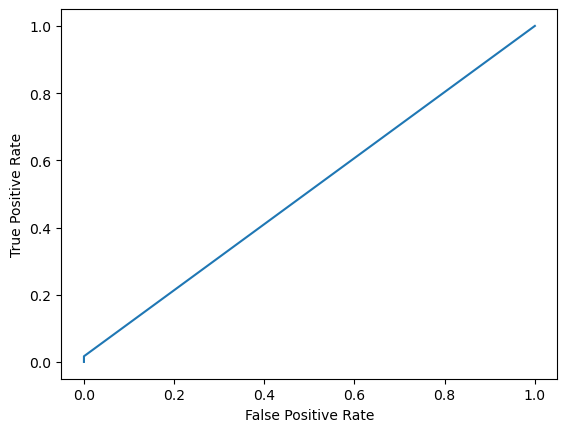

In [17]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 

## f

In [18]:
vechicle_credit_data = train_data.drop(['loan_purpose_2_0', 'loan_purpose_2_1', 'loan_purpose_3.0'], axis=1)
vechicle_credit_data_val = val_data.drop(['loan_purpose_2_0', 'loan_purpose_2_1', 'loan_purpose_3.0'], axis=1)

In [19]:
X_train = vechicle_credit_data.drop(columns=['Default indicator', '_r_', 'Application date'])
y_train = vechicle_credit_data['Default indicator']

X_val = vechicle_credit_data_val.drop(columns=['Default indicator', '_r_', 'Application date'])
y_val = vechicle_credit_data_val['Default indicator']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_val_scaled)

accuracy = accuracy_score(y_val, y_pred)
print(accuracy)

conf_matrix = confusion_matrix(y_val, y_pred)
print(conf_matrix)


0.9667230682459109
[[3427    0]
 [ 118    1]]


Text(0, 0.5, 'True Positive Rate')

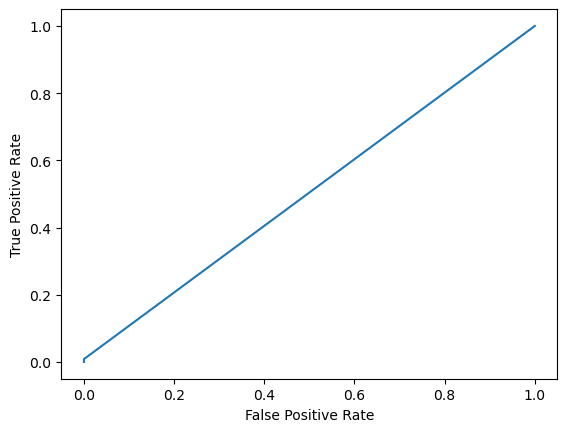

In [20]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 

In [21]:
property_credit_data = train_data.drop(['loan_purpose_1_0', 'loan_purpose_1_1', 'loan_purpose_3.0', 'Value of the goods'], axis=1)
property_credit_data_val = val_data.drop(['loan_purpose_1_0', 'loan_purpose_1_1', 'loan_purpose_3.0', 'Value of the goods'], axis=1)

In [22]:
X_train = property_credit_data.drop(columns=['Default indicator', '_r_', 'Application date'])
y_train = property_credit_data['Default indicator']

X_val = property_credit_data_val.drop(columns=['Default indicator', '_r_', 'Application date'])
y_val = property_credit_data_val['Default indicator']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_val_scaled)

accuracy = accuracy_score(y_val, y_pred)
print(accuracy)

conf_matrix = confusion_matrix(y_val, y_pred)
print(conf_matrix)


0.9670050761421319
[[3427    0]
 [ 117    2]]


Text(0, 0.5, 'True Positive Rate')

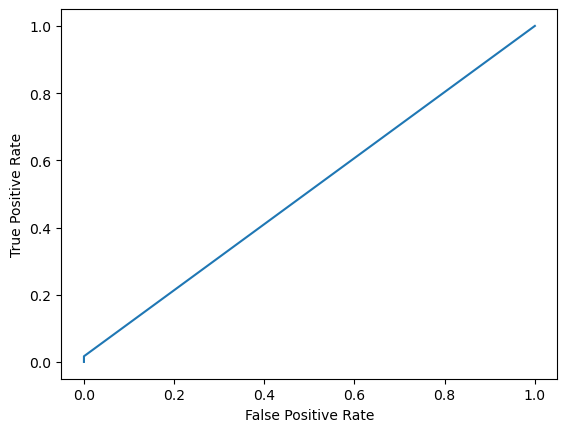

In [23]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 

In [4]:
log_reg = sm.Logit(y_train, X_train_scaled).fit() 

Optimization terminated successfully.
         Current function value: 0.684677
         Iterations 30


In [5]:
print(log_reg.summary()) 

                           Logit Regression Results                           
Dep. Variable:      Default indicator   No. Observations:                35392
Model:                          Logit   Df Residuals:                    35345
Method:                           MLE   Df Model:                           46
Date:                Tue, 12 Mar 2024   Pseudo R-squ.:                  -3.962
Time:                        13:18:26   Log-Likelihood:                -24232.
converged:                       True   LL-Null:                       -4883.8
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -4.102e-05      0.023     -0.002      0.999      -0.045       0.045
x2             0.0240      0.036      0.664      0.507      -0.047       0.095
x3            -0.0026      0.014     -0.190      0.8

In [6]:
yhat = log_reg.predict(X_train_scaled) 
prediction = list(map(round, yhat)) 
# confusion matrix 
cm = confusion_matrix(y_train, prediction)  
print ("Confusion Matrix : \n", cm)  
  
# accuracy score of the model 
print('Test accuracy = ', accuracy_score(y_train, prediction))

Confusion Matrix : 
 [[21578 12719]
 [  278   817]]
Test accuracy =  0.6327701175406871


Text(0, 0.5, 'True Positive Rate')

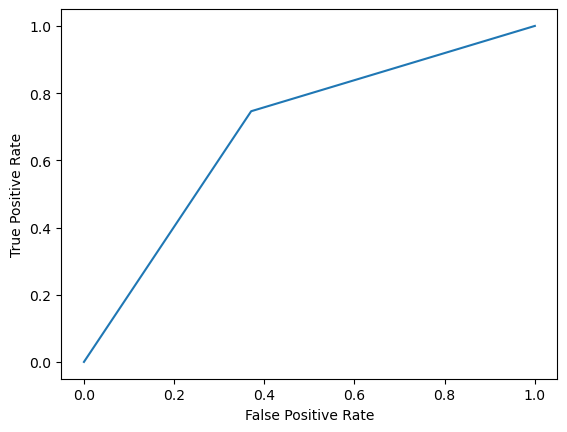

In [10]:
fpr, tpr, thresholds = roc_curve(y_train, prediction)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 

In [7]:
cols = log_reg.pvalues[log_reg.pvalues <= 0.05].index

len(cols)

11

In [9]:
col_list = X_train.columns.values.tolist()

In [10]:
cols_2 = []

for x in cols:
    idx = int(x[1:]) - 1
    print(type(idx))
    cols_2.append(col_list[idx])


<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>


In [48]:
train_data = preprocess_data(data_cleaner(get_dataFrame_withShortCols('development_sample.csv')))
val_data = preprocess_data(data_cleaner(get_dataFrame_withShortCols('testing_sample.csv')))

c:\Users\mikol\PycharmProjects\Pre-selection Assignment\Pre-selection-Assignment\source\utils.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan_purpose_1_0'] = ((df_loan_purpose['loan_purpose_1.0'] == 1) & (df['Clasification of the vehicle'] == 0)).astype(int)
c:\Users\mikol\PycharmProjects\Pre-selection Assignment\Pre-selection-Assignment\source\utils.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan_purpose_1_1'] = ((df_loan_purpose['loan_purpose_1.0'] == 1) & (df['Clasification of

In [41]:
X_train = train_data[cols_2]
y_train = train_data['Default indicator']

X_val = val_data[cols_2]
y_val = val_data['Default indicator']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

log_reg = sm.Logit(y_train, X_train_scaled).fit() 

Optimization terminated successfully.
         Current function value: 0.685196
         Iterations 6


In [43]:
len(X_train.columns.values.tolist())

11

In [42]:
yhat = log_reg.predict(X_train_scaled) 
prediction = list(map(round, yhat)) 
# confusion matrix 
cm = confusion_matrix(y_train, prediction)  
print ("Confusion Matrix : \n", cm)  
  
# accuracy score of the model 
print('Test accuracy = ', accuracy_score(y_train, prediction))

Confusion Matrix : 
 [[22073 12224]
 [  334   761]]
Test accuracy =  0.6451740506329114


Text(0, 0.5, 'True Positive Rate')

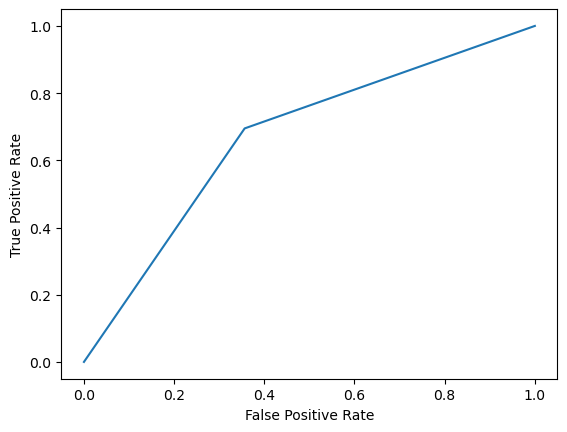

In [45]:
fpr, tpr, thresholds = roc_curve(y_train, prediction)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 

In [46]:
X_train = train_data[cols_2]
y_train = train_data['Default indicator']

X_val = val_data[cols_2]
y_val = val_data['Default indicator']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_val_scaled)

accuracy = accuracy_score(y_val, y_pred)
print(accuracy)

conf_matrix = confusion_matrix(y_val, y_pred)
print(conf_matrix)

0.9664410603496898
[[3427    0]
 [ 119    0]]


In [14]:
from imblearn.over_sampling import SMOTE

train_data.drop(columns=['_r_', 'Application date'], inplace=True)

smot = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = smot.fit_resample(train_data.drop('Default indicator', axis=1), train_data['Default indicator'])
readyDF = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)
readyDF['Default indicator'].value_counts()

Default indicator
0.0    34297
1.0    34297
Name: count, dtype: int64

In [15]:

ytrain = readyDF['Default indicator']
Xtrain = readyDF.drop('Default indicator', axis = 1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(Xtrain)




In [16]:
log_reg = sm.Logit(ytrain, X_train_scaled).fit() 
print(log_reg.summary()) 

Optimization terminated successfully.
         Current function value: 0.503393
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:      Default indicator   No. Observations:                68594
Model:                          Logit   Df Residuals:                    68583
Method:                           MLE   Df Model:                           10
Date:                Tue, 12 Mar 2024   Pseudo R-squ.:                  0.2738
Time:                        13:20:10   Log-Likelihood:                -34530.
converged:                       True   LL-Null:                       -47546.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1587      0.012    -12.837      0.000      -0.183      -0.134
x2            -0.2240      0.

Confusion Matrix : 
 [[32522  1775]
 [16951 17346]]
Test accuracy =  0.7270023617225997


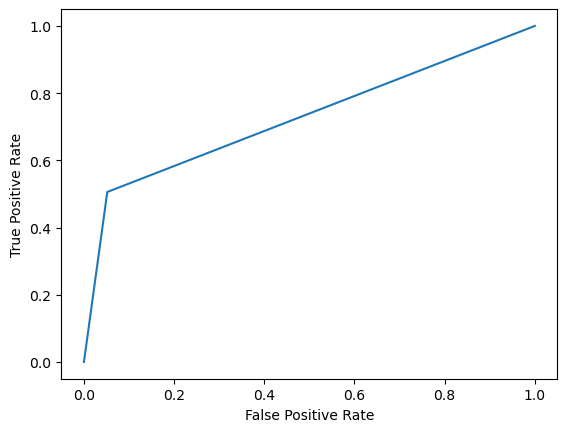

<Axes: >

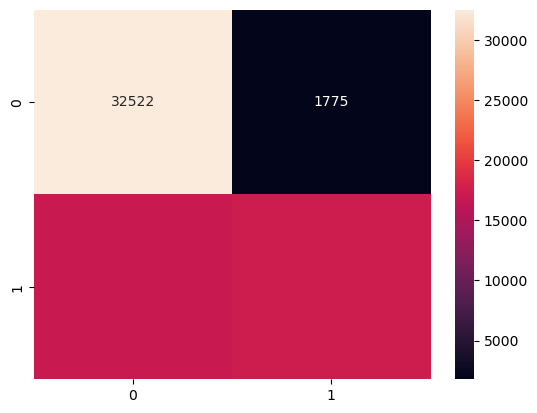

In [17]:
yhat = log_reg.predict(X_train_scaled) 
prediction = list(map(round, yhat)) 
# confusion matrix 
cm = confusion_matrix(ytrain, prediction)  
print ("Confusion Matrix : \n", cm)  
  
# accuracy score of the model 
print('Test accuracy = ', accuracy_score(ytrain, prediction))

fpr, tpr, thresholds = roc_curve(ytrain, prediction)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.show()
snus.heatmap(cm, annot=True, fmt='g')